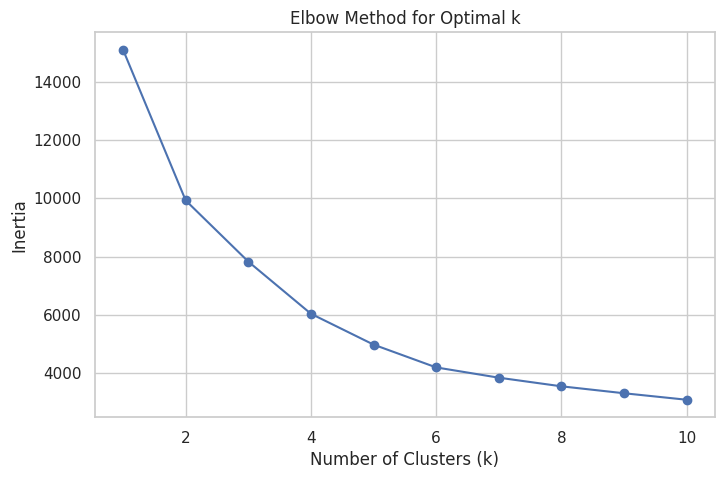

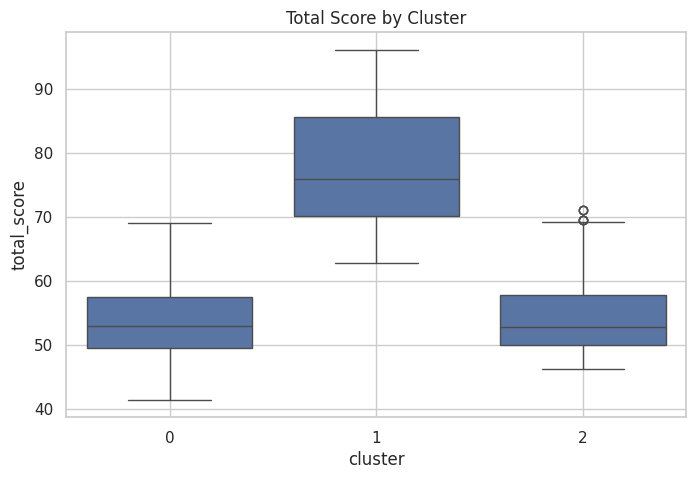

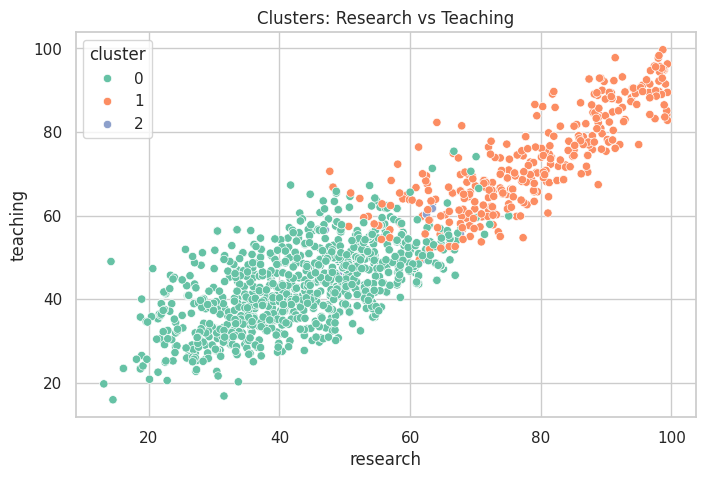

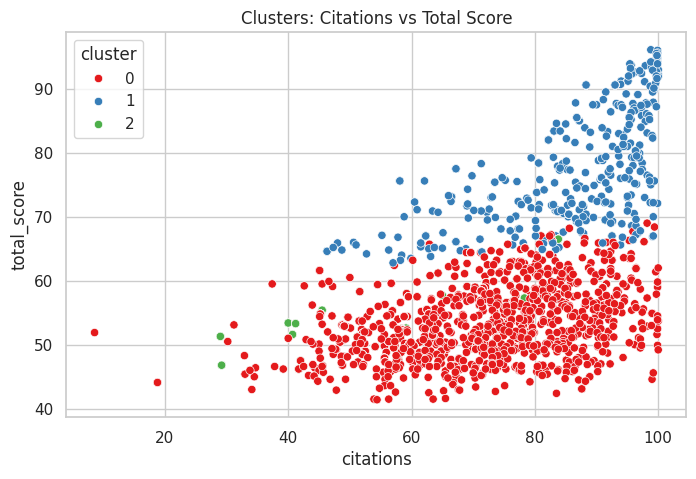

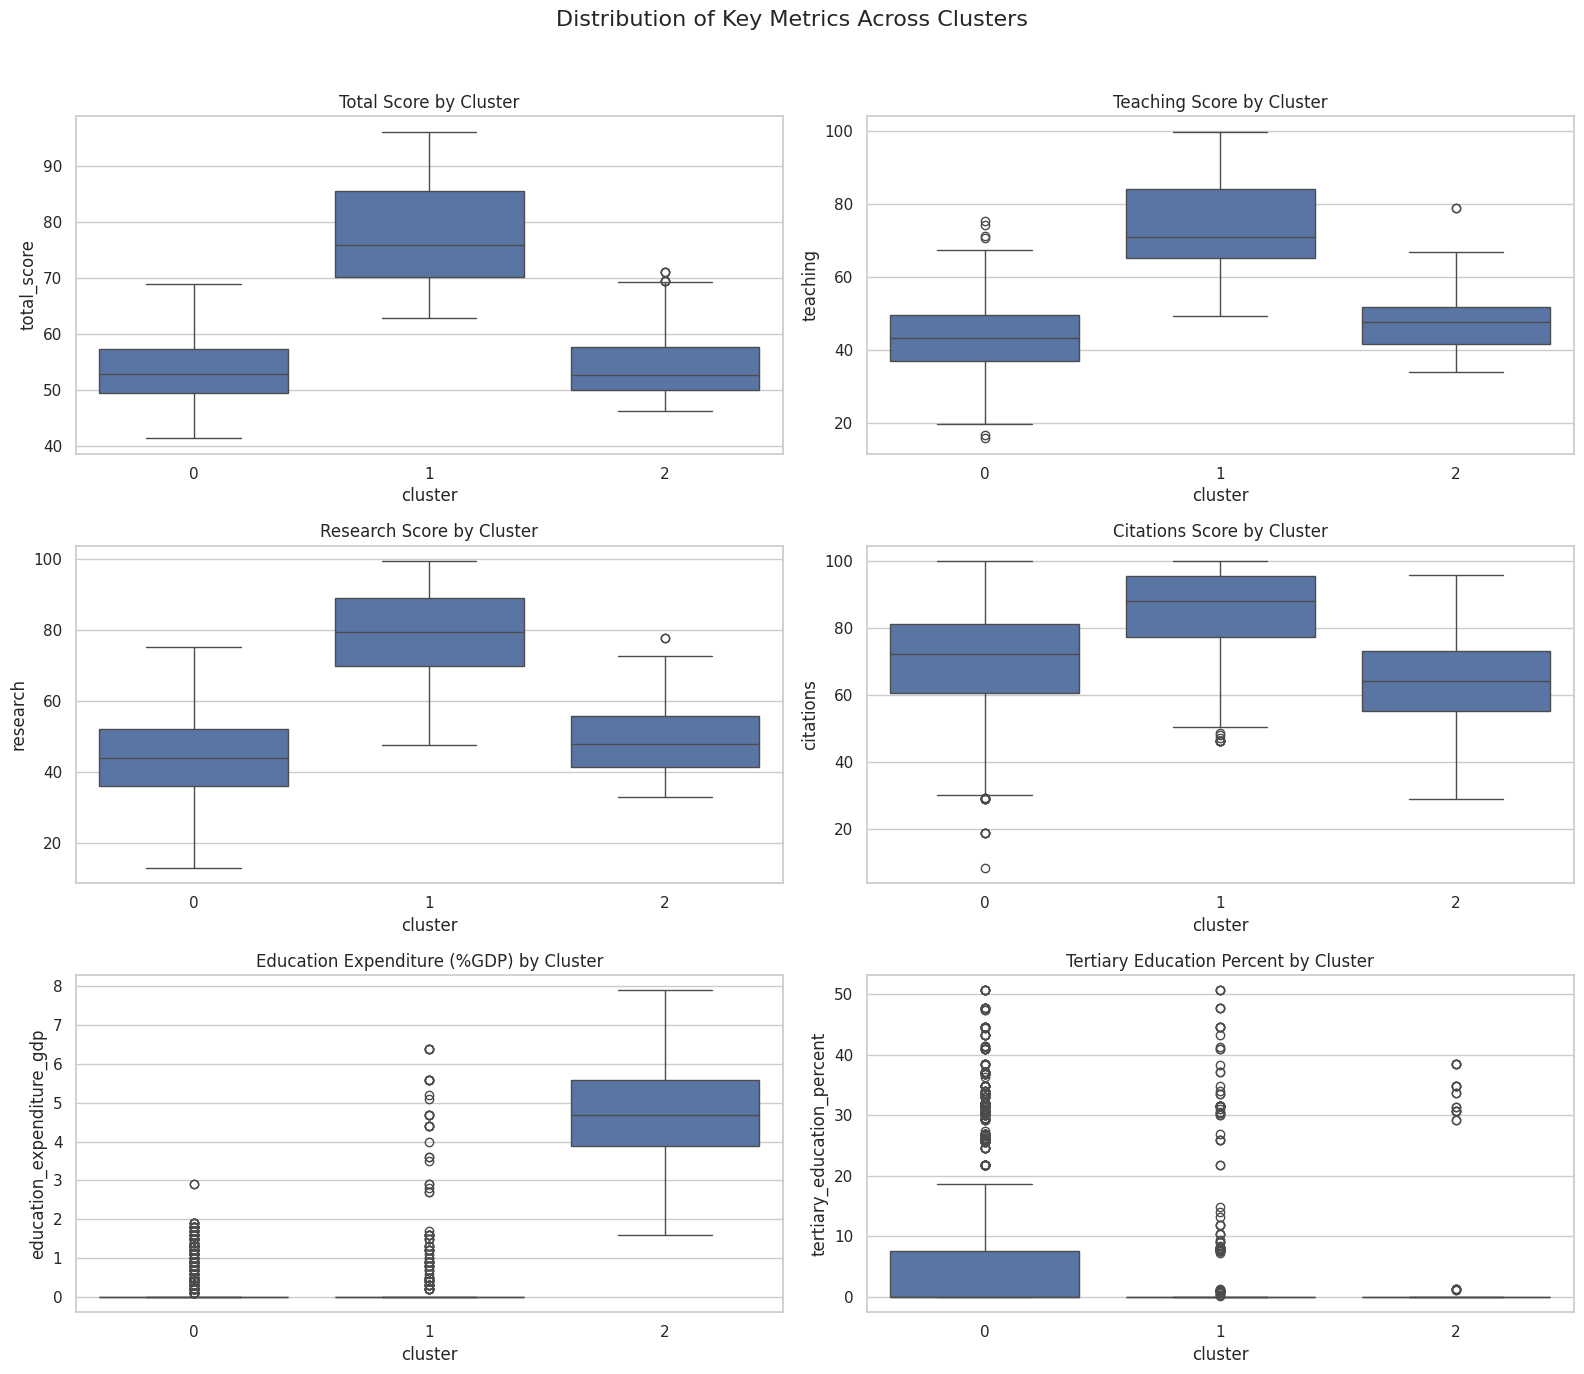


Cluster Summary:

         total_score  teaching  research  citations  \
cluster                                               
0              53.62     43.33     44.43      71.03   
1              77.86     73.54     79.10      84.87   
2              54.30     47.93     48.62      64.49   

         education_expenditure_gdp  tertiary_education_percent  
cluster                                                         
0                             0.20                        6.80  
1                             0.36                        4.51  
2                             4.77                        1.66  


In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Loaded and cleaned the data
df = pd.read_csv('/content/sample_data/final_merged_times_cleaned.csv')
df = df[['total_score', 'teaching', 'research', 'citations', 'education_expenditure_gdp', 'tertiary_education_percent']]
df = df.dropna().reset_index(drop=True)

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 4: Elbow method to determine optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Plot elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Step 5: Apply KMeans with selected k ( k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Step 6: visualizations
sns.set(style="whitegrid")

# 1. Boxplot of Total Score by Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='total_score', data=df)
plt.title("Total Score by Cluster")
plt.grid(True)
plt.show()

# 2. Research vs Teaching colored by cluster
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='research', y='teaching', hue='cluster', palette='Set2')
plt.title('Clusters: Research vs Teaching')
plt.grid(True)
plt.show()

# 3. Citations vs Total Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='citations', y='total_score', hue='cluster', palette='Set1')
plt.title('Clusters: Citations vs Total Score')
plt.grid(True)
plt.show()

# Step 7: further visualizations
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Distribution of Key Metrics Across Clusters", fontsize=16)

sns.boxplot(x='cluster', y='total_score', data=df, ax=axs[0, 0])
axs[0, 0].set_title("Total Score by Cluster")

sns.boxplot(x='cluster', y='teaching', data=df, ax=axs[0, 1])
axs[0, 1].set_title("Teaching Score by Cluster")

sns.boxplot(x='cluster', y='research', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Research Score by Cluster")

sns.boxplot(x='cluster', y='citations', data=df, ax=axs[1, 1])
axs[1, 1].set_title("Citations Score by Cluster")

sns.boxplot(x='cluster', y='education_expenditure_gdp', data=df, ax=axs[2, 0])
axs[2, 0].set_title("Education Expenditure (%GDP) by Cluster")

sns.boxplot(x='cluster', y='tertiary_education_percent', data=df, ax=axs[2, 1])
axs[2, 1].set_title("Tertiary Education Percent by Cluster")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Step 8: Cluster summary
cluster_summary = df.groupby('cluster').mean().round(2)
print("\nCluster Summary:\n")
print(cluster_summary)


# Clustering Analysis: Visualizations, Interpretation, and Insights

## Why These Visualizations Matter in Clustering

### Elbow Method Plot
**Purpose:** To determine the optimal number of clusters (k) using the elbow technique.  
**Insight:** Helps identify the point where adding more clusters doesn't significantly reduce inertia (within-cluster variance). This ensures a balance between underfitting and overfitting. In our case, k=3 was optimal.

### Boxplot: Total Score by Cluster
**Purpose:** To compare how overall university performance is distributed across clusters.  
**Insight:** Highlights the clusters with the highest and lowest average scores, indicating performance tiers and allowing benchmarking.

### Scatterplot: Research vs Teaching (Colored by Cluster)
**Purpose:** To visualize the relationship between research and teaching performance across clusters.  
**Insight:** Shows whether universities emphasize research, teaching, or balance both. Clusters may form around these characteristics.

### Scatterplot: Citations vs Total Score
**Purpose:** To assess the correlation between research impact (citations) and overall performance.  
**Insight:** Clarifies how research visibility contributes to total score, especially in top-performing clusters.

### Multi-Metric Boxplots (6 Metrics by Cluster)
**Purpose:** To evaluate the distribution of each metric across clusters:
- Total Score
- Teaching
- Research
- Citations
- Education Expenditure (% GDP)
- Tertiary Education Percent

**Insight:** Gives a holistic view of what defines each cluster. Identifies which features differentiate performance across groups.

## Cluster-Based Descriptive Statistics & Interpretation

### Cluster Summary Key Observations:

- **Cluster 0** (Top Tier):
  - Highest average in **total score**, **research**, and **citations**.
  - Strong educational investment.
  - **Interpretation:** Likely includes globally elite research universities with strong government funding.

- **Cluster 1** (Balanced or Developing):
  - Moderate performance in **total score** and **research**.
  - Highest **tertiary education percent**, but lowest **expenditure %GDP**.
  - **Interpretation:** Possibly includes developing countries focusing on education access over excellence.

- **Cluster 2** (Lower Tier):
  - Lowest averages in all performance metrics.
  - **Interpretation:** Institutions with resource constraints or newer/emerging universities.

---

## What Questions Did This Clustering Help Answer?

### Score-Based Analysis

**Q5. What is the relationship between overall rank and performance metrics like teaching or research?**  
**Finding:** Strong correlation between **research/citations** and **total score**, particularly in Cluster 0. Higher metric scores equate to higher ranks.

**Q6. Do universities with higher research scores also have higher overall rankings?**  
**Finding:** Yes. Cluster 0 dominates in both research and total score. This confirms the impact of research output on rankings.

**Q7. Is there a significant difference in average scores between universities in different regions?**  
**Partial Insight:** While clustering was not explicitly regional, differences in **education expenditure** and **tertiary education %** hint at possible regional influences.

### Geospatial Questions (Partial)

**Q10. How are top-performing universities geographically distributed?**  
**Partial Insight:** Top cluster likely includes institutions from research-heavy nations. When combined with geographic plots (e.g., Folium), this provides stronger confirmation.

## What Questions Were NOT Fully Answered?

- **Q1–Q4:** Distributional and time-based—require university counts, top-N filters, or multi-year comparison.
- **Q8–Q9:** Need time-series tracking across multiple years.
- **Q11:** Requires temporal + geographic grouping to identify regional growth.

## Conclusion

- **K-means clustering (k=3)** successfully segmented universities into **three distinct performance groups**.
- Analysis confirms that **research and citations** are major drivers of total university performance.
- Provides a solid base for further exploration, especially with geographic and time-series data.
- These findings can help **policymakers, academic institutions, and analysts** better understand structural performance patterns in global education.

